In [188]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from universe import *
from mass_func import *
from corr_func import *
import seaborn as sns
from utils import *
from pairwise import *

def SetPlotStyleSpectra():
#    rc('text',usetex=True)
   rc('font',**{'family':'serif','serif':['Computer Modern']})
   plt.rcParams['axes.linewidth']  = 3.
   plt.rcParams['axes.labelsize']  = 24
   plt.rcParams['axes.titlesize']  = 20
   plt.rcParams['xtick.labelsize'] = 20
   plt.rcParams['ytick.labelsize'] = 18
   plt.rcParams['xtick.major.size'] = 7
   plt.rcParams['ytick.major.size'] = 7
   plt.rcParams['xtick.minor.size'] = 3
   plt.rcParams['ytick.minor.size'] = 3
   plt.rcParams['legend.fontsize']  = 18
   plt.rcParams['legend.frameon']  = False

   plt.rcParams['xtick.major.width'] = 1
   plt.rcParams['ytick.major.width'] = 1
   plt.rcParams['xtick.minor.width'] = 1
   plt.rcParams['ytick.minor.width'] = 1
   # plt.clf()
   sns.set(rc('font',**{'family':'serif','serif':['Computer Modern']}))
   sns.set_style("ticks", {'figure.facecolor': 'grey'})

SetPlotStyleSpectra() 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
# Setting up cosmo class
cosmo = Cosmo()

In [233]:
zmin = 0.1
zmax = 0.2
Nz   = 1
rmin = 1
rmax = 250
Nr   = 100

In [165]:
pw = BinPairwise(cosmo, zmin, zmax, Nz, rmin, rmax, Nr, fsky=.15, M_min=1e14, kmin=None, kmax=None)
print pw.M_min

...calcultating volumes...
...done...
...calcultating HMF quantities...
mass limits set
nu_Min: 1e-06 nu_Max: 26.9862612006
spline initialized
normalizations evaluated
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
I AM COMPUTING XI
...done...
...calcultating N_pair...
4671.19591537
...done...
1e+14


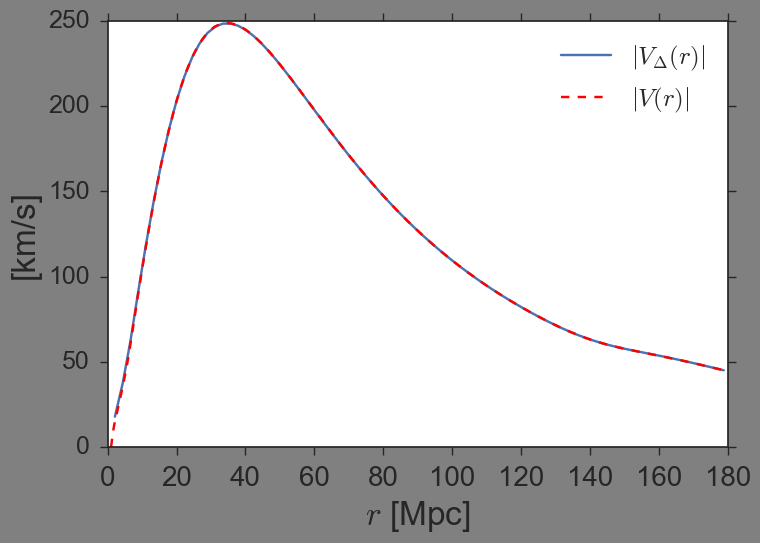

In [166]:
r = np.linspace(1,180,10000)
plt.plot(pw.rmean, -pw.V_Delta[0], label=r'$|V_{\Delta}(r)|$')
plt.plot(r, -pw.v_12[0](r), 'r--', label=r'$|V(r)|$')
# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'[km/s]')

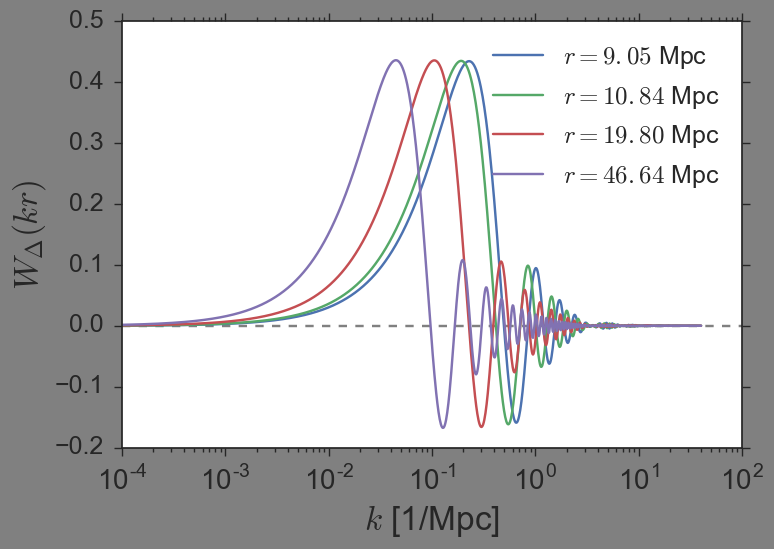

In [127]:
k = np.logspace(np.log10(pw.kmin),np.log10(pw.kmax),1000)
plt.axhline(ls='--', color='grey')
plt.plot(k, W_Delta(k, pw.rbin_edges[4],pw.rbin_edges[5]), label=r'$r =%.2f$ Mpc' %pw.rmean[4])
plt.plot(k, W_Delta(k, pw.rbin_edges[5],pw.rbin_edges[6]), label=r'$r =%.2f$ Mpc' %pw.rmean[5])
plt.plot(k, W_Delta(k, pw.rbin_edges[10],pw.rbin_edges[11]), label=r'$r =%.2f$ Mpc' %pw.rmean[10])
plt.plot(k, W_Delta(k, pw.rbin_edges[25],pw.rbin_edges[26]), label=r'$r =%.2f$ Mpc' %pw.rmean[25])
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel(r'$k$ [1/Mpc]')
plt.ylabel(r'$W_{\Delta}(kr)$')

...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
8992.23049583
...done...
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
4383.04310504
...done...
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...don

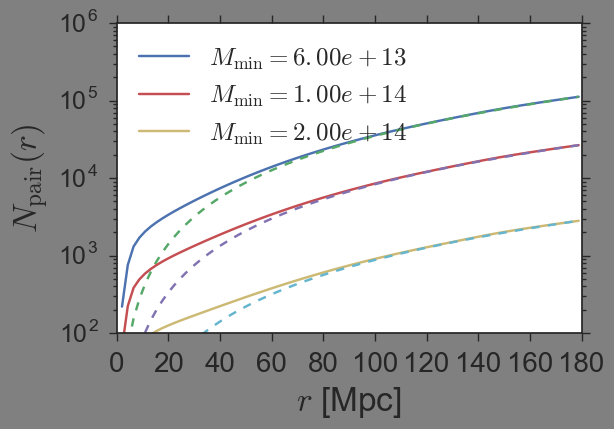

In [217]:
for m in [6e13, 1e14, 2e14]:
    pw = BinPairwise(cosmo, zmin, zmax, Nz, rmin, rmax, Nr, fsky=.15, M_min=m, kmin=None, kmax=None)
    plt.plot(pw.rmean, pw.nhalo[0]**2 * pw.V_sur[0]*pw.V_bin*(1.+pw.bias[0]**2*pw.xi[0](pw.rmean))/2., label=r'$M_{\rm min}=%.2e$'%m)
    plt.plot(pw.rmean, pw.nhalo[0]**2 * pw.V_sur[0]*pw.V_bin/2.,'--')
plt.yscale('log')
plt.ylim([1e2,1e6])
plt.legend(loc='best')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$N_{\rm pair}(r)$')

In [259]:
pw = BinPairwise(cosmo, zmin, zmax, Nz, rmin, rmax, Nr, fsky=.15, M_min=1e14, kmin=None, kmax=None)


...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
4383.04310504
...done...


In [235]:
# Calculating Gaussian cov
cc = pw.Cov_cosmic()

In [236]:
# Calculating Gaussian shot-noise cov
cgs = pw.Cov_gauss_shot()

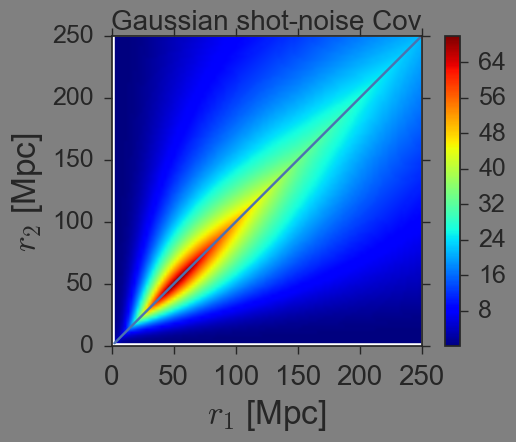

In [237]:
plt.imshow(cgs[0], extent=[pw.rmean.min(),pw.rmean.max(),pw.rmean.min(),pw.rmean.max()], cmap='jet', origin='lower')
plt.colorbar()
x = np.linspace(pw.rmean.min(),pw.rmean.max(),1000)
plt.plot(x,x)
plt.title('Gaussian shot-noise Cov')
plt.xlabel(r'$r_1$ [Mpc]')
plt.ylabel(r'$r_2$ [Mpc]')

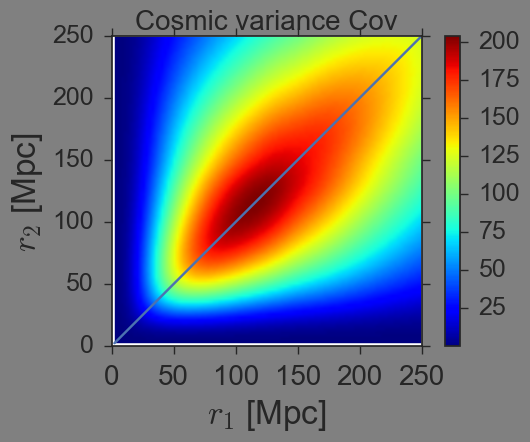

In [238]:
plt.imshow(cc[0], extent=[pw.rmean.min(),pw.rmean.max(),pw.rmean.min(),pw.rmean.max()], cmap='jet', origin='lower')
plt.colorbar()
x = np.linspace(pw.rmean.min(),pw.rmean.max(),1000)
plt.plot(x,x)
plt.title('Cosmic variance Cov')
plt.xlabel(r'$r_1$ [Mpc]')
plt.ylabel(r'$r_2$ [Mpc]')

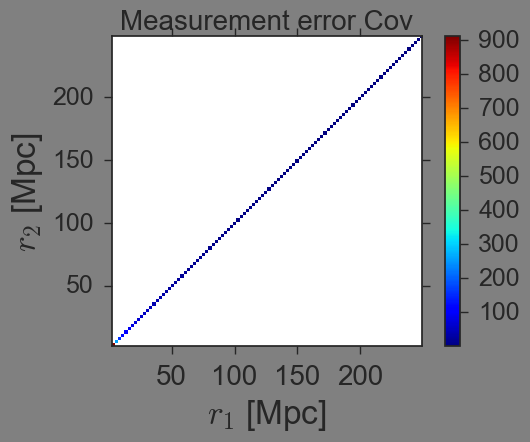

In [301]:
cm = pw.Cov_meas(sigma_v=160.)
plt.imshow(cm[0], extent=[pw.rmean.min(),pw.rmean.max(),pw.rmean.min(),pw.rmean.max()], cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
x = np.linspace(pw.rmean.min(),pw.rmean.max(),1000)
# plt.plot(x,x)
plt.title('Measurement error Cov')
plt.xlabel(r'$r_1$ [Mpc]')
plt.ylabel(r'$r_2$ [Mpc]')

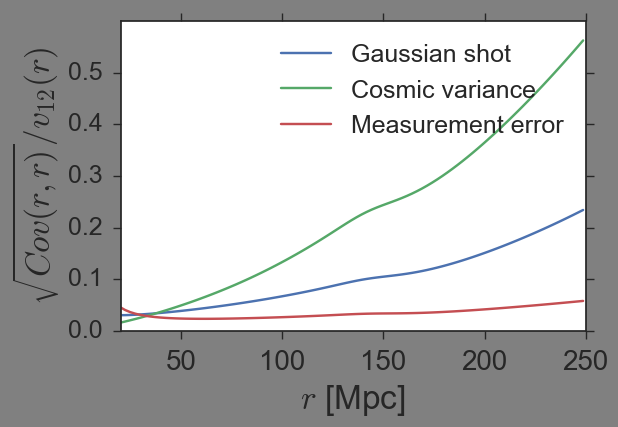

In [302]:
plt.plot(pw.rmean, -np.diag(cgs[0])**.5/pw.V_Delta[0], label='Gaussian shot')
plt.plot(pw.rmean, -np.diag(cc[0])**.5/pw.V_Delta[0], label='Cosmic variance')
plt.plot(pw.rmean, -np.diag(cm[0])**.5/pw.V_Delta[0], label='Measurement error')
plt.xlim([20,rmax])
plt.ylim([0,0.6])
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$\sqrt{Cov(r,r)}/v_{12}(r)$')
plt.legend()

-1.2
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
...done...
-1.0
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...


...done...
...calcultating N_pair...
...done...
-0.8
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
...done...


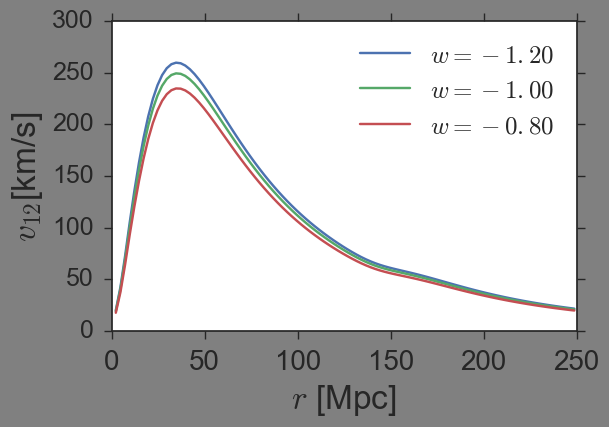

In [285]:
ws = [-1.2, -1., -0.8]
ksz = {}
for w_ in ws:
    cosmo_ = Cosmo(params={'w':w_})
    print cosmo_.params_dict['w']
    pw = BinPairwise(cosmo_, zmin, zmax, Nz, rmin, rmax, Nr, fsky=.15, M_min=1e14, kmin=None, kmax=None)
    ksz[w_] = pw.V_Delta[0]
    plt.plot(pw.rmean, -pw.V_Delta[0], label=r'$w=%.2f$' %w_)
plt.legend(loc='best')
plt.xlabel(r'$r$ [Mpc]')

plt.ylabel(r'$v_{12}$[km/s]')

...here comes the plot...


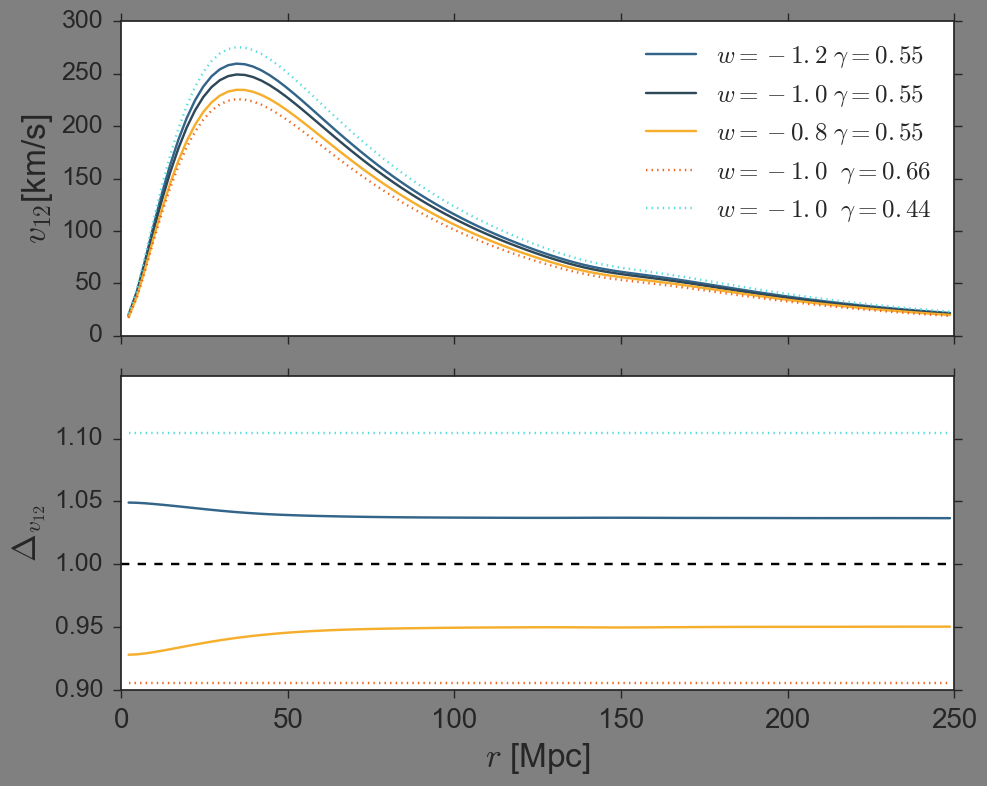

In [320]:
colors = {-1:'#2F4858', -1.2:'#33658A', -0.8:'#F6AE2D', 0.44:'#55DDE0', 0.66:'#F26419'}
f, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(10,8))

# plt.suptitle(' '.join(title))

ax1.legend(loc='best')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for w_ in ws:
    ax1.plot(pw.rmean, -ksz[w_], color=colors[w_], label=r'$w=%.1f$' %w_ + r' $\gamma=0.55$')
for gamma in gammas:
    ax1.plot(pw.rmean, -ksz_gamma[gamma], ':', color=colors[gamma], label=r'$w=-1.0$ '+ r' $\gamma=%.2f$' %gamma)

# ax1.set_ylim()
# ax1.set_xlim(xlim)
ax1.legend(loc='best')
ax1.set_ylabel(r'$v_{12}$[km/s]')

ax2.plot(pw.rmean, ksz[-0.8]/ksz[-1], color=colors[-0.8])
ax2.plot(pw.rmean, ksz[-1.2]/ksz[-1], color=colors[-1.2])
ax2.plot(pw.rmean, ksz_gamma[0.44]/ksz[-1], ':', color=colors[0.44])
ax2.plot(pw.rmean, ksz_gamma[0.66]/ksz[-1], ':', color=colors[0.66])
ax2.set_xlabel(r'$r$ [Mpc]')
ax2.axhline(1, ls='--', color='k')
ax2.set_ylabel(r'$\Delta_{v_{12}}$')
# ax2.set_ylim([0.8,1.25])

print("...here comes the plot...")

plt.tight_layout()
plt.show()

In [308]:
mydict = {'a':1,'b':3}

In [314]:
gammas = [0.66,0.44]
ksz_gamma = {}
cosmo_ = Cosmo()
for gamma in gammas:
    pw = BinPairwise(cosmo_, zmin, zmax, Nz, rmin, rmax,  Nr, gamma0=gamma, fsky=.15, M_min=1e14, kmin=None, kmax=None)
    ksz_gamma[gamma] = pw.V_Delta[0]


...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
...done...
...calcultating volumes...
...done...
...calcultating HMF quantities...
	mass and z limits set
	spline initialized
...done...
...calcultating Correlation functions xi(r,z)...
...done...
...calcultating pairwise velocity v_12(r,z)...
...done...
...calcultating volume bin averaged V(r,z)...
...done...
...calcultating N_pair...
...done...


In [321]:
def compute_derivs_gamma(step):

    print "Calculating forward difference for gamma"
    gamma_ = 0.55 + 0.5*step
    
    pw = BinPairwise(cosmo_, zmin, zmax, Nz, rmin, rmax,  Nr, gamma0=gamma_, fsky=.15, M_min=1e14, kmin=None, kmax=None)

    # print pparams

    pCls = pw.V_Delta[0]
    
    print "Calculating backward difference for gamma"
    gamma_ = 0.55 - 0.5*step

    # print mparams

    pw = BinPairwise(cosmo_, zmin, zmax, Nz, rmin, rmax,  Nr, gamma0=gamma_, fsky=.15, M_min=1e14, kmin=None, kmax=None)

    mCls = pw.V_Delta[0]

    dCls = (pCls-mCls)/step

    return dCls, pCls, mCls

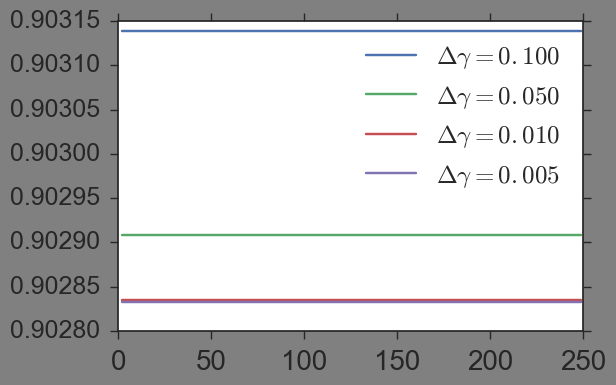

In [343]:
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
for dx in [0.1,0.05,0.01,0.005]:
    plt.plot(pw.rmean, -dv[dx]/ksz[-1], label=r'$\Delta\gamma=%.3f$' %dx)
    plt.legend()
#     print -dv[dx]/ksz[-1]

In [345]:
cosmo_.sigma_Rz(8/.677,0.86)

0.51432791095349917